In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding = 'latin1')

In [3]:
# drop address line 2 column
df.drop(columns = 'ADDRESSLINE2', inplace =True)

In [4]:
# add new series for profit
df['profit'] = df['QUANTITYORDERED'] * df['PRICEEACH']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


In [6]:
#Convert ORDERDATE from object to datetime
df["ORDERDATE"]  = pd.to_datetime(df["ORDERDATE"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,profit
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2871.00
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2765.90
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3746.70
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4900.00


In [10]:
# ADD Month Name Dataframe
df["MONTH_NAME"] = df["ORDERDATE"].dt.month_name()

In [11]:
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,profit,MONTH_NAME
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2871.00,February
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2765.90,May
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34,July
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3746.70,August
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4900.00,October


In [12]:
#sales per DEAL SIZE
sales_per_deal_size = df.groupby('DEALSIZE')["SALES"].sum().sort_values(ascending = True).reset_index()
sales_per_deal_size.head()

,DEALSIZE,SALES
0,Large,1302119.26
1,Small,2643077.35
2,Medium,6087432.24


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [14]:
#Sales per month
df_monthly_sales = df.groupby('MONTH_NAME')[["SALES"]].sum().sort_values(by = 'SALES', ascending = False).reset_index()
df_monthly_sales


,MONTH_NAME,SALES
0,November,2118885.67
1,October,1121215.22
2,May,923972.56
3,February,810441.90
4,January,785874.44
5,March,754501.39
6,April,669390.96
7,August,659310.57
8,December,634679.12
9,September,584724.27


In [15]:
df["MONTH_ID"]

0        2
1        5
2        7
3        8
4       10
        ..
2818    12
2819     1
2820     3
2821     3
2822     5
Name: MONTH_ID, Length: 2823, dtype: int64

In [16]:
#sales by quarter
quarter_sales = df.groupby('QTR_ID')[["SALES"]].sum().sort_values(by = 'SALES', ascending = False).reset_index()
quarter_sales

,QTR_ID,SALES
0,4,3874780.01
1,1,2350817.73
2,2,2048120.30
3,3,1758910.81


In [17]:
# top 10 customers by profit
df_top_customers = df.groupby('CONTACTFIRSTNAME')[['SALES']].sum().sort_values(by = 'SALES', ascending = False).reset_index()
df_top_customers.head(10)

,CONTACTFIRSTNAME,SALES
0,Valarie,944892.37
1,Diego,912294.11
2,Julie,430815.43
3,Sue,292979.86
4,Michael,288797.20
5,Maria,212054.53
6,Juri,203992.95
7,Peter,200995.41
8,Jeff,197736.94
9,Elizabeth,192643.12


In [18]:
# sales per country
df.country_sales = df.groupby('COUNTRY')[['SALES']].sum().sort_values(by = 'SALES', ascending = False).reset_index()
df.country_sales.head(10)

<ipython-input-18-fa1ff82dc5eb>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.country_sales = df.groupby('COUNTRY')[['SALES']].sum().sort_values(by = 'SALES', ascending = False).reset_index()


,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


In [19]:
#top 5 product line
top_productline = df.groupby('PRODUCTLINE')[['SALES']].sum().sort_values(by ='SALES' , ascending = False).reset_index()
top_productline 

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Vintage Cars,1903150.84
2,Motorcycles,1166388.34
3,Trucks and Buses,1127789.84
4,Planes,975003.57
5,Ships,714437.13
6,Trains,226243.47


In [20]:
#Sales per year
df_year = df.groupby('YEAR_ID')['SALES'].sum().sort_values(ascending = False).reset_index()
df_year.head()

,YEAR_ID,SALES
0,2004,4724162.60
1,2003,3516979.54
2,2005,1791486.71


In [21]:
#how many products where cancelled?
mask = df['STATUS']== 'Cancelled'
df[mask].groupby('STATUS')[['SALES']].sum()

,SALES
STATUS,
Cancelled,194487.48


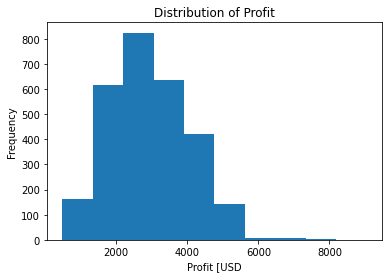

In [22]:
plt.hist(df["profit"])
plt.xlabel("Profit [USD")
plt.ylabel("Frequency")
plt.title ("Distribution of Profit");

In [23]:
df.country_sales = df.groupby('COUNTRY')['profit'].sum().sort_values(ascending = True)
df.country_sales = df.country_sales.head(5)

# Top 5 Country with Most Profit

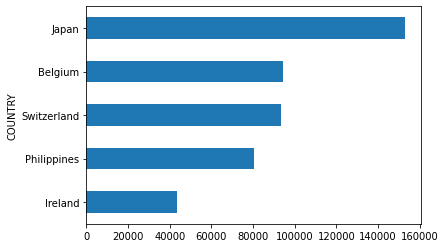

In [24]:
df.country_sales.plot(kind ='barh')

In [25]:
product_line = df.groupby('PRODUCTLINE')['profit'].sum().sort_values( ascending = True)
product_line

PRODUCTLINE
Trains               203804.26
Ships                677940.40
Planes               877942.21
Trucks and Buses     947355.18
Motorcycles          971086.29
Vintage Cars        1644212.05
Classic Cars        2968546.40
Name: profit, dtype: float64

# Top Product Line

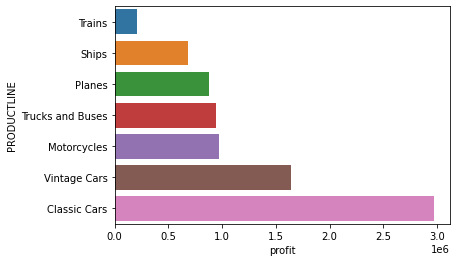

In [26]:
sns.barplot(product_line,product_line.index);

In [29]:
monthly_sales = df.groupby('MONTH_NAME')[['SALES']].sum().sort_values(by = 'SALES', ascending = False)
monthly_sales

,SALES
MONTH_NAME,
November,2118885.67
October,1121215.22
May,923972.56
February,810441.90
January,785874.44
March,754501.39
April,669390.96
August,659310.57
December,634679.12


# Sales Trend

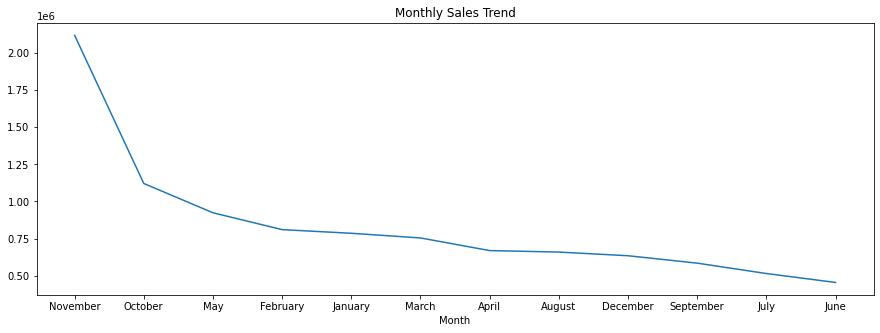

In [32]:
plt.figure(figsize = (15,5))
plt.plot(monthly_sales)
plt.xlabel("Month")
plt.title("Monthly Sales Trend")
plt.show();
